# WEB PROGRAMMING USING PYTHON
- [Socket](https://www.cs.dartmouth.edu/~campbell/cs60/socketprogramming.html)
- API
- BeautifulSoup

## Socket
- **TCP** (Transmission Control Protocol)
- **UDP** (User Datagram Protocol)

### TCP

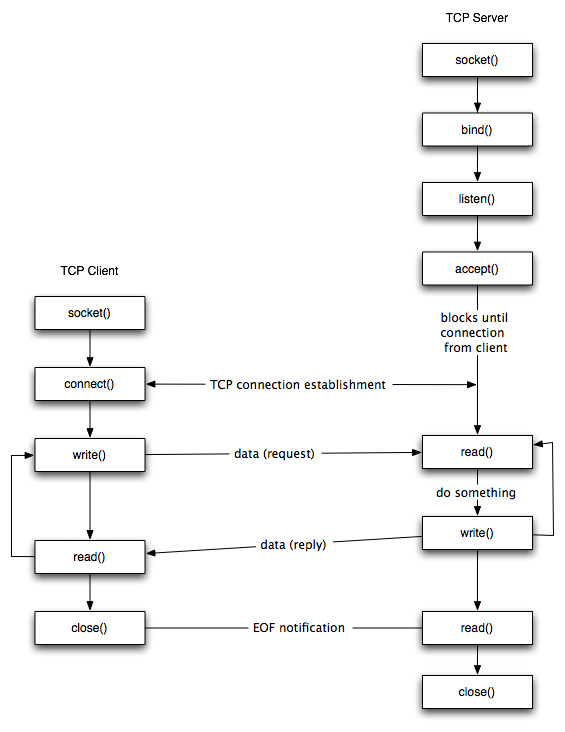

#### tcp_client.py
```python
import socket
host = socket.gethostname() #as both run on same computer
port = 5000
client_socket = socket.socket()
client_socket.connect((host, port))
msg = input("client: ")
while msg.lower().strip() != "bye":
    client_socket.send(msg.encode())
    print("server:", client_socket.recv(1024).decode())
    msg = input("client: ")
client_socket.close()
```

#### tcp_server.py
```python
import socket
host = socket.gethostname() #as both run on same computer
port = 5000
server_socket = socket.socket()
server_socket.bind((host, port))
server_socket.listen()
conn, address = server_socket.accept()
print("Connection from", str(address))
while True: 
    data = conn.recv(1024).decode()
    if not data: break
    print("client:", data)
    msg = input("server: ")
    conn.send(msg.encode())
conn.close()
```

### UDP

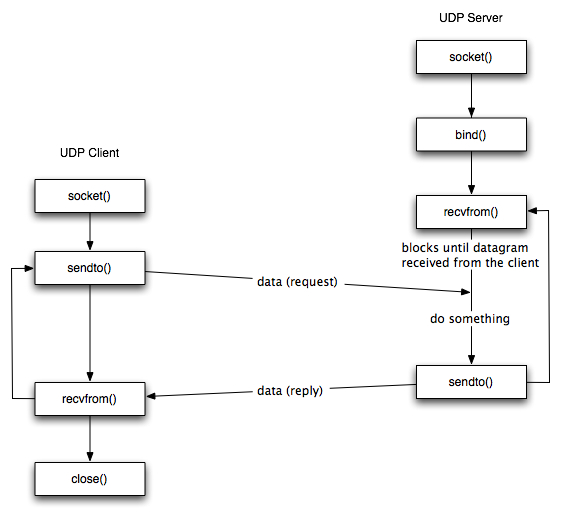

#### udp_client.py
```python
import socket
host=socket.gethostname()
port=8000
ADDR=host, port
client=socket.socket(type=socket.SOCK_DGRAM)
while True:
    msg=input('client --> ')
    client.sendto(msg.encode(), ADDR)
    if not msg: break
    rep, ADDR=client.recvfrom(1024)
    rep=rep.decode()
    if not rep: break
    print(f'server({ADDR}) --> {rep}')
client.close()
```

#### udp_server.py
```python
import socket
host=socket.gethostname()
port=8000
ADDR=host, port
server=socket.socket(type=socket.SOCK_DGRAM)
server.bind(ADDR)
while True:
    rep, addr=server.recvfrom(1024)
    if not rep: break
    print(f'client({addr}) --> {rep.decode()}')
    msg=input('server --> ')
    server.sendto(msg.encode(), addr)
    if not msg: break
server.close()
```

### Simple Web Browser

In [1]:
import socket
my_socket=socket.socket()
my_socket.connect(("gtu.ac.in", 80))
command='GET  https://gtu.ac.in/Circular_Acedemics.aspx HTTP/1.0\r\n\r\n'
my_socket.send(command.encode())
while True:
    res=my_socket.recv(1024).decode()
    if not res: break
    print(res)
my_socket.close()

HTTP/1.1 200 OK
Date: Thu, 18 Jul 2024 05:15:18 GMT
Content-Type: text/html; charset=utf-8
Content-Length: 142418
Connection: close
Cache-Control: private
Server: Microsoft-IIS/10.0
Set-Cookie: ASP.NET_SessionId=xf1hx5vfahm2pm3s54ho3e3r; path=/; HttpOnly
X-Content-Type-Options: nosniff
X-XSS-Protection: 1; mode=block




<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>
	Gujarat Technological University
</title>

    <!-- Meta line commented & added by Vishwa - 05/09/2022-->
    
    <meta charset="utf-8" name="viewport" content="width=device-width, initial-scale=1.0" />
    <!-- Responsive css -->
<link rel="stylesheet" href="assets/css/responsive.css" /><link rel="shortcut icon" type="image/x-icon" href="assets/img/favicon.ico" /><link rel="stylesheet" href="assets/css/odometer-theme-default.css" /><link rel="stylesheet" type="text/css" href="assets/vendor

### HTTP Server

In [2]:
import socket

In [3]:
def createserver():
    server=socket.socket()
    server.bind(('localhost', 4500))
    server.listen()
    while True:
        client, addr = server.accept()
        rec=client.recv(5000).decode()
        print(rec)
        data='HTTP/1.1 200 Ok\r\n'
        data+='Content-Type: text/html; charset=utf-8\r\n'
        data+='\r\n'
        data+=f'<html><body>{addr}</body></html>\r\n\r\n'
        client.send(data.encode())
    server.close()

```
GET / HTTP/1.1
Host: localhost:4500
Connection: keep-alive
sec-ch-ua: "Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"
sec-ch-ua-mobile: ?0
sec-ch-ua-platform: "Windows"
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7
Sec-Fetch-Site: none
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Sec-Fetch-Dest: document
Accept-Encoding: gzip, deflate, br, zstd
Accept-Language: en-US,en;q=0.9
Cookie: username-localhost-8888="2|1:0|10:1720505008|23:username-localhost-8888|196:eyJ1c2VybmFtZSI6ICI5MjlmZjVmMjA4YmU0ODZlOWJiOGQ3ZTdkOWM2YWJkNyIsICJuYW1lIjogIkFub255bW91cyBTcG9uZGUiLCAiZGlzcGxheV9uYW1lIjogIkFub255bW91cyBTcG9uZGUiLCAiaW5pdGlhbHMiOiAiQVMiLCAiY29sb3IiOiBudWxsfQ==|d46b389dbaeaaa43d3c7b4ee42d31f514e589cc37d089e1c0e17ff0d731fbde6"; _xsrf=2|cb85b27a|72b794fadf704f18df8e67ae9213255c|1720505008
```255c|1720505008

In [4]:
# createserver()

## API

In [5]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd
load_dotenv()  # take environment variables from .env.

True

In [6]:
def print_json(data):
    print(json.dumps(data, indent=2))

### [Geocoding API](https://openweathermap.org/api/geocoding-api)


In [7]:
def get_coor(city_name):
    url = f'http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code
    coor= res.json()
    lat, lon = coor[0]['lat'], coor[0]['lon']
    return (lat, lon)

In [8]:
print(get_coor('Ahmedabad'))

(23.0216238, 72.5797068)


### [Current weather data](https://openweathermap.org/current)

In [9]:
def get_current_weather_data(city_name):
    try:
        lat, lon = get_coor(city_name)
    except Error as e:
        return ''
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code
    data = res.json()
    return {
        'temp': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'visibiltiy': data['visibility'],
        'description': data['weather'][0]['description'],
        'wind speed': data['wind']['speed'],
        'pressure': data['main']['pressure'],
        'country': data['sys']['country']
    }

In [10]:
print_json(get_current_weather_data('Delhi'))

{
  "temp": 307.21,
  "humidity": 70,
  "visibiltiy": 3500,
  "description": "haze",
  "wind speed": 2.57,
  "pressure": 1000,
  "country": "IN"
}


### [Air Pollution API](https://openweathermap.org/api/air-pollution)


In [11]:
def get_air_pollution(city_name):
    try:
        lat, lon = get_coor(city_name)
    except Error as e:
        return ''
    url = f'http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code
    aqi = res.json()['list'][0]['main']['aqi']
    return ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'][aqi-1]

In [12]:
get_air_pollution('Bombay')

'Fair'

### [Call 5 day / 3 hour forecast data](https://openweathermap.org/forecast5)


In [13]:
def day5_hour3_weather_forecast(city_name):
    try:
        lat, lon = get_coor(city_name)
    except Error as e:
        return
    url = f'http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code 
    list = res.json()['list']
    sea_level, date_time, temp, pressure, humidity, description, wind_speed = [], [], [], [], [], [], []
    
    for data in list:
        sea_level.append(data['main']['sea_level'])
        date_time.append(data['dt_txt'])
        temp.append(data['main']['temp'])
        pressure.append(data['main']['pressure'])
        humidity.append(data['main']['humidity'])
        description.append(data['weather'][0]['description'])
        wind_speed.append(data['wind']['speed'])
    
    return pd.DataFrame({
        'sea_level': sea_level, 
        'date_time': date_time,
        'temp': temp,
        'pressure': pressure,
        'humidity': humidity,
        'description': description,
        'wind_speed': wind_speed
    })

In [14]:
day5_hour3_weather_forecast('bombay')

,sea_level,date_time,temp,pressure,humidity,description,wind_speed
0,1004,2024-07-18 06:00:00,299.18,1004,89,heavy intensity rain,7.37
1,1004,2024-07-18 09:00:00,299.35,1004,88,moderate rain,7.74
2,1003,2024-07-18 12:00:00,299.66,1003,87,moderate rain,8.60
3,1004,2024-07-18 15:00:00,300.15,1004,87,moderate rain,9.36
4,1004,2024-07-18 18:00:00,300.35,1004,86,moderate rain,10.06
5,1002,2024-07-18 21:00:00,300.37,1002,86,moderate rain,9.66
6,1002,2024-07-19 00:00:00,300.50,1002,86,moderate rain,8.76
7,1003,2024-07-19 03:00:00,300.75,1003,86,moderate rain,8.45
8,1003,2024-07-19 06:00:00,301.10,1003,84,moderate rain,8.36
9,1001,2024-07-19 09:00:00,301.12,1001,84,moderate rain,8.57


### Task Ahmedabad VS Bombay Temp difference

In [15]:
ahmedabad = day5_hour3_weather_forecast('ahmedabad')
bombay = day5_hour3_weather_forecast('bombay')
df=pd.DataFrame({
    "date_time": ahmedabad['date_time'],
    'ahmedabad_temp': ahmedabad['temp'],
    'bombay_temp': bombay['temp'],
})

df['temp_diff'] = df['ahmedabad_temp'] - df['bombay_temp']

df

,date_time,ahmedabad_temp,bombay_temp,temp_diff
0,2024-07-18 06:00:00,306.56,299.18,7.38
1,2024-07-18 09:00:00,307.35,299.35,8.00
2,2024-07-18 12:00:00,306.83,299.66,7.17
3,2024-07-18 15:00:00,304.76,300.15,4.61
4,2024-07-18 18:00:00,302.91,300.35,2.56
5,2024-07-18 21:00:00,301.69,300.37,1.32
6,2024-07-19 00:00:00,301.35,300.50,0.85
7,2024-07-19 03:00:00,302.20,300.75,1.45
8,2024-07-19 06:00:00,305.42,301.10,4.32
9,2024-07-19 09:00:00,307.75,301.12,6.63


## BeautifulSoup

In [16]:
import requests
from bs4 import BeautifulSoup

### [Movies](https://subslikescript.com/)

#### Titanic Script

In [17]:
url = f'https://subslikescript.com/movie/Titanic-120338'

In [18]:
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    # print(soup.prettify())
    title=soup.find('h1').text.strip()
    # print(title)
    plot = soup.find('p', class_='plot').text.strip()
    # print(plot)
    full_script = soup.find('div', class_='full-script').text.strip()
    # print(full_script)
    article =  soup.find('article', class_='main-article').text.strip()
    # print(article)
    with open(f'{title}.txt', 'w', encoding='utf-8') as file:
        file.write(full_script)
else:
    print(f'Failed to fetch URL: {url}')

#### Movies List

In [19]:
res = requests.get('https://subslikescript.com/movies')
soup = BeautifulSoup(res.content, 'html.parser')
li_list = soup.find('ul', class_='scripts-list').find_all('li')
movies = [li.text.strip() for li in li_list]    
print(movies)

['One Day as a Lion (2023)', 'Goliath (2019)', 'Silk Road (2017)', 'On the Fringe (2022)', 'Prophet (2022)', 'Cut, Color, Murder (2022)', 'Night of the Skull (1974)', 'Cane Toads: The Conquest (2010)', 'Rooming with Danger (2023)', 'The Exit Row (2023)', 'Despise Not, My Youth (2022)', 'Come Here (2021)', 'Monster X (2017)', 'Canne mozze (1977)', 'Some Like It Cool (1977)', 'Malek (2019)', 'Barbie: A Fairy Secret (2011)', 'Amigos (2023)', 'Vegas: Based on a True Story (2008)', 'Always Shine (2016)', 'Panduan Mempersiapkan Perpisahan (2022)', 'Night Bus (2017)', 'Clown of the Dead (2015)', 'The Ballad of the Sad Cafe (1991)', 'Gaslight (2023)', 'Yakuza Ladies (1986)', 'Coast Guard Malaysia: Ops Helang (2023)', 'The Object of Beauty (1991)', "L'empire de la nuit (1962)", 'Match Struck (2023)']


In [20]:
res = requests.get('https://subslikescript.com/movies')
soup = BeautifulSoup(res.content, 'html.parser')
li_list = soup.find('ul', class_='scripts-list').find_all('li')
movies = [li.text.strip() for li in li_list]    
print(movies)

['One Day as a Lion (2023)', 'Goliath (2019)', 'Silk Road (2017)', 'On the Fringe (2022)', 'Prophet (2022)', 'Cut, Color, Murder (2022)', 'Night of the Skull (1974)', 'Cane Toads: The Conquest (2010)', 'Rooming with Danger (2023)', 'The Exit Row (2023)', 'Despise Not, My Youth (2022)', 'Come Here (2021)', 'Monster X (2017)', 'Canne mozze (1977)', 'Some Like It Cool (1977)', 'Malek (2019)', 'Barbie: A Fairy Secret (2011)', 'Amigos (2023)', 'Vegas: Based on a True Story (2008)', 'Always Shine (2016)', 'Panduan Mempersiapkan Perpisahan (2022)', 'Night Bus (2017)', 'Clown of the Dead (2015)', 'The Ballad of the Sad Cafe (1991)', 'Gaslight (2023)', 'Yakuza Ladies (1986)', 'Coast Guard Malaysia: Ops Helang (2023)', 'The Object of Beauty (1991)', "L'empire de la nuit (1962)", 'Match Struck (2023)']


#### All Page Movies

In [21]:
movie_list = []
page=1
while True:
    if len(movie_list) > 60:
        break
    url_page = f'https://subslikescript.com/movies?page={page}'
    res = requests.get(url_page)
    if response.status_code != 200:
        break
    soup = BeautifulSoup(res.content, 'html.parser')
    li_list = soup.find('ul', class_='scripts-list').find_all('li')
    if len(li_list) == 0:
        break
    movie = [li.text.strip() for li in li_list]
    movie_list.extend(movie)
    page+=1
print(movie_list)

['One Day as a Lion (2023)', 'Goliath (2019)', 'Silk Road (2017)', 'On the Fringe (2022)', 'Prophet (2022)', 'Cut, Color, Murder (2022)', 'Night of the Skull (1974)', 'Cane Toads: The Conquest (2010)', 'Rooming with Danger (2023)', 'The Exit Row (2023)', 'Despise Not, My Youth (2022)', 'Come Here (2021)', 'Monster X (2017)', 'Canne mozze (1977)', 'Some Like It Cool (1977)', 'Malek (2019)', 'Barbie: A Fairy Secret (2011)', 'Amigos (2023)', 'Vegas: Based on a True Story (2008)', 'Always Shine (2016)', 'Panduan Mempersiapkan Perpisahan (2022)', 'Night Bus (2017)', 'Clown of the Dead (2015)', 'The Ballad of the Sad Cafe (1991)', 'Gaslight (2023)', 'Yakuza Ladies (1986)', 'Coast Guard Malaysia: Ops Helang (2023)', 'The Object of Beauty (1991)', "L'empire de la nuit (1962)", 'Match Struck (2023)', 'Adam & the Water (2022)', 'The Night of the Sorcerers (1974)', 'Baka bukas (2016)', 'Novio a la vista (1954)', 'Corridos: Tales of Passion & Revolution (1987)', 'Nudes4Sale (2020)', 'Death in Brun

#### All Movies Script

In [22]:
try:
    res = requests.get('https://subslikescript.com/movies')
    soup = BeautifulSoup(res.content, 'html.parser')
    li_list = soup.find('ul', class_='scripts-list').find_all('li')
    a_list = [li.find('a') for li in li_list]
    for a in a_list:
        res_2 = requests.get(f'https://subslikescript.com{a['href']}')
        soup_2 = BeautifulSoup(res_2.content, 'html.parser')
        full_script = soup_2.find('div', class_='full-script').text.strip()
        with open(f'movies/{a.text.strip()}.txt', 'w', encoding='utf-8') as file:
            file.write(full_script)
except Exception as e:
    print('e')

### [Polotifact](https://www.politifact.com/)

#### Facts

In [23]:
import pandas as pd

In [24]:
res = requests.get('https://www.politifact.com/factchecks/')
soup = BeautifulSoup(res.content, 'html.parser')
li_list = soup.find('ul', class_='o-listicle__list').find_all('li')
facts = []
for li in li_list: 
    a = li.find('div', class_='m-statement__content').find('a')
    facts.append({
            'statement': a.text.strip(),
            'link': f'https://www.politifact.com{a['href']}',
            'date': li.find('footer').text.strip().split('•')[1],
            'source': li.find('div', class_='m-statement__meta').find('a').text.strip()
    })

pd.DataFrame(facts)

,statement,link,date,source
0,"""Unlike Mike Pence, (J.D.) Vance said he would...",https://www.politifact.com/factchecks/2024/jul...,"July 18, 2024",Kamala Harris
1,A photo shows proof of a bullet hole in Trump’...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Facebook posts
2,Milwaukee's Marcus Performing Arts Center – wh...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Jon Stewart
3,"“Just last week, Ruben Gallego voted to let th...",https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Kari Lake
4,The Secret Service staged the July 13 shooting...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Threads posts
5,Video shows Donald Trump sleeping at the Repub...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",X posts
6,Photo shows that two days after former Preside...,https://www.politifact.com/factchecks/2024/jul...,"July 16, 2024",Threads posts
7,The shooter who attempted to assassinate Donal...,https://www.politifact.com/factchecks/2024/jul...,"July 16, 2024",Instagram posts
8,Photos show former President Donald Trump golf...,https://www.politifact.com/factchecks/2024/jul...,"July 16, 2024",Social Media
9,Switzerland banned mammograms.,https://www.politifact.com/factchecks/2024/jul...,"July 16, 2024",Instagram posts


#### Scrape 3 page data Politifact

In [25]:
all_facts = []
page = 1
while page < 4:
    print(f'Processing Page {page}')
    page_url = f'https://www.politifact.com/factchecks/?page={page}'
    print(page_url)
    facts = []
    
    try:
        res = requests.get(page_url)
        soup = BeautifulSoup(res.content, 'html.parser')
        li_list = soup.find('ul', class_='o-listicle__list').find_all('li')
        for li in li_list: 
            a = li.find('div', class_='m-statement__content').find('a')
            facts.append({
                    'statement': a.text.strip(),
                    'link': f'https://www.politifact.com{a['href']}',
                    'date': li.find('footer').text.strip().split('•')[1],
                    'source': li.find('div', class_='m-statement__meta').find('a').text.strip()
            })
    except Exception as e:
        print(e)
    
    print(f'No of posts: {len(facts)}')
    print('-'*50)
    all_facts.extend(facts)
    page += 1

pd.DataFrame(all_facts)

Processing Page 1
https://www.politifact.com/factchecks/?page=1
No of posts: 30
--------------------------------------------------
Processing Page 2
https://www.politifact.com/factchecks/?page=2
No of posts: 30
--------------------------------------------------
Processing Page 3
https://www.politifact.com/factchecks/?page=3
No of posts: 30
--------------------------------------------------


,statement,link,date,source
0,"""Unlike Mike Pence, (J.D.) Vance said he would...",https://www.politifact.com/factchecks/2024/jul...,"July 18, 2024",Kamala Harris
1,A photo shows proof of a bullet hole in Trump’...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Facebook posts
2,Milwaukee's Marcus Performing Arts Center – wh...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Jon Stewart
3,"“Just last week, Ruben Gallego voted to let th...",https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Kari Lake
4,The Secret Service staged the July 13 shooting...,https://www.politifact.com/factchecks/2024/jul...,"July 17, 2024",Threads posts
...,...,...,...,...
85,"""There were 42,000 people diagnosed with (an) ...",https://www.politifact.com/factchecks/2024/jun...,"June 28, 2024",Instagram posts
86,“Actor and comedian Tim Allen died suddenly” i...,https://www.politifact.com/factchecks/2024/jun...,"June 28, 2024",Facebook posts
87,The Gates Foundation “awarded $9.5 million to ...,https://www.politifact.com/factchecks/2024/jun...,"June 28, 2024",Instagram posts
88,“Under (the Biden) administration we have witn...,https://www.politifact.com/factchecks/2024/jun...,"June 28, 2024",David Crowley


#### Indian Express Headline

In [26]:
url = "https://indianexpress.com/"
res = requests.get(url)
soup = BeautifulSoup(res.content , 'html.parser')
top_news = [li.text.strip() for li in soup.find('div', class_="top-news").find_all('li')]
for no, news in enumerate(top_news, 1): print(f'{no}: {news}')

1: After backlash, Karnataka Govt puts private sector quota Bill on hold
2: Jaish suspects infiltrated six months ago, ‘stayed off grid’ in Jammu
3: Churn in BJP in UP, Bengal: all eyes on party high command's next moves
4: Looking to turn up heat on BJP govt, LoP Patnaik forms 'shadow cabinet', assigns depts to BJD MLAs
5: Explained: The state of India's informal economySubscriber Only


### QB 335

Write a program of web scrapping using BeautifulSoup to scrape the given data from the following link.
https://editorial.rottentomatoes.com/guide/popular-movies/
On the above link, you’ll find 30 Popular movies. Scrape the Movie Title and Rating of that particular movie and make a Dataframe of the
same.

In [27]:
url = 'https://editorial.rottentomatoes.com/guide/popular-movies/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
items = soup.find('div', class_="articleContentBody").find_all("div", class_="countdown-item")
movies = []
for item in items:
    movie_title = item.find('div',class_='article_movie_title')
    movies.append({
        'title': movie_title.find('a').text.strip(),
        'rating': movie_title.find('span', class_='tMeterScore').text.strip()
    })

pd.DataFrame(movies)

,title,rating
0,Longlegs,87%
1,Fly Me to the Moon,66%
2,Twisters,78%
3,A Quiet Place: Day One,87%
4,Despicable Me 4,55%
5,The Bikeriders,81%
6,Horizon: An American Saga - Chapter 1,48%
7,Beverly Hills Cop: Axel F,66%
8,Hit Man,95%
9,Inside Out 2,91%


### QB 352

Find the table on the page and its rows, Extract the data from each row, and print it url='https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

In [30]:
res = requests.get('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')
soup = BeautifulSoup(res.content, 'html.parser')
table = soup.find('table', class_='wikitable')
headers = [th.text.strip() for th in table.find_all('th')]
rows = table.find_all('tr')[1:]
lists = []
flag = False
for row in rows:
    cols = row.find_all('td')
    row_ = {}
    for index in range(1, len(cols) if flag else len(cols) - 1):
        row_[headers[index]] = cols[index - 1 if flag else index].text.strip()
    lists.append(row_)
    try:
        if cols[0]['rowspan']: flag = True
    except: 
        flag = False
pd.DataFrame(lists).head(50)

,Location,Population,% ofworld,Date,Source (official or fromthe United Nations)
0,World,"8,118,865,000",100%,17 Jul 2024,UN projection[3]
1,China,"1,409,670,000",17.4%,31 Dec 2023,Official estimate[5]
2,India,"1,404,910,000",17.3%,1 Jul 2024,Official projection[6]
3,United States,"335,893,238",4.1%,1 Jan 2024,Official estimate[7]
4,Indonesia,"281,603,800",3.5%,1 Jul 2024,National annual projection[8]
5,Pakistan,"241,499,431",3.0%,1 Mar 2023,2023 census result[9]
6,Nigeria,"223,800,000",2.8%,1 Jul 2023,Official projection[10]
7,Brazil,"203,080,756",2.5%,1 Aug 2022,2022 census result[11]
8,Bangladesh,"169,828,911",2.1%,14 Jun 2022,2022 census result[12]
9,Russia,"146,150,789",1.8%,1 Jan 2024,Official estimate[13]


### Static HTML

In [29]:
content = open('movie.html')
soup = BeautifulSoup(content, "html.parser")
# print(soup.prettify())
li_list = [li.text.strip() for li in soup.find_all('li')]
print(soup.find('h1').text.strip())
print(li_list)

Subtitles like scripts. What's here?
['Blind Detective', 'Killer Workout', 'Budapest Noir', 'Firefly', 'Warriors of the Rainbow: Seediq Bale II', 'Sex Appeal', 'Lonesome', 'Corri uomo corri', 'Faraway', 'The Treasure of Swamp Castle', 'Australian Survivor - season 4, episode 18 - Episode #4.18', 'Australian Survivor - season 4, episode 17 - Episode #4.17', 'Australian Survivor - season 4, episode 16 - Episode #4.16', 'Australian Survivor - season 4, episode 15 - Episode #4.15', 'Australian Survivor - season 4, episode 10 - Episode #4.10', 'Australian Survivor - season 4, episode 9 - Episode #4.9', 'Australian Survivor - season 4, episode 8 - Episode #4.8', 'Australian Survivor - season 4, episode 7 - Episode #4.7', 'Australian Survivor - season 4, episode 6 - Episode #4.6', 'Australian Survivor - season 4, episode 5 - Episode #4.5', 'BROS. Last Call - 10', 'Rubaru Roshni - 10', 'Banking on Africa: The Bitcoin Revolution - 10', 'Breaking the Chain - 10', 'Ludo - 10', 'Papachenko - 10', 